In [9]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import matplotlib.style as style
import calendar

style.use('fivethirtyeight')
df = pd.read_csv('medbillca.csv') #Insert file within the quotes here! 
df = df.iloc[1:]
df.head()
df['Date']=df.index
df = df.reset_index(drop=True)
df.head()
df = df[['Date','Category: All categories']]
df['Demand'] = df['Category: All categories']
df = df[['Date','Demand']]
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['quarter'] = df['Date'].dt.quarter
df['finQ'] = df['Date'].dt.to_period("Q")
df['Demand'] = df['Demand'].astype(int)
df.tail()

,Date,Demand,year,month,quarter,finQ
256,2019-11-10,75,2019,Nov,4,2019Q4
257,2019-11-17,76,2019,Nov,4,2019Q4
258,2019-11-24,47,2019,Nov,4,2019Q4
259,2019-12-01,69,2019,Dec,4,2019Q4
260,2019-12-08,68,2019,Dec,4,2019Q4


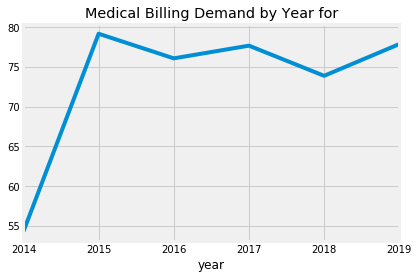

In [10]:
%matplotlib inline
year = pd.pivot_table(df, index='year', values = 'Demand', aggfunc = 'mean')
year['Demand'] = round(year['Demand'],1)
year.plot(title = "Medical Billing Demand by Year for", legend=False)

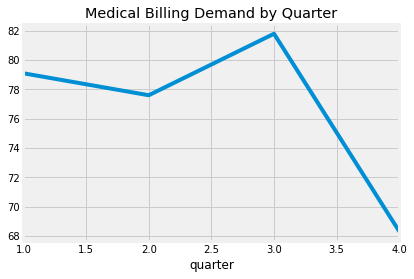

In [11]:
quarter = pd.pivot_table(df, index='quarter', values = 'Demand', aggfunc = 'mean')
quarter['Demand'] = round(quarter['Demand'],1)

quarter.plot(title = "Medical Billing Demand by Quarter", legend=False)

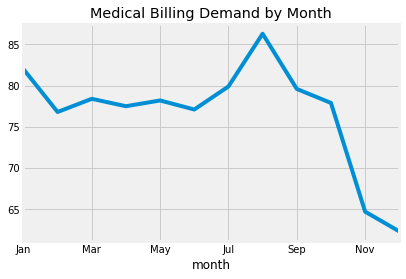

In [12]:
month = pd.pivot_table(df, index='month', values = 'Demand', aggfunc = 'mean')
month['Demand'] = round(month['Demand'],1)
month = month.reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug','Sep', 'Oct', 'Nov','Dec'])
month.plot(title = "Medical Billing Demand by Month", legend=False)